# Project: Insurance Fraud Detection (DS)
---------------------------------------------

**Dr. Dave Wanik - OPIM 5512: Data Science Using Python - University of Connecticut**

*This dataset comes from the 2023 NESS Statathon (Theme 1). Here is a link to where the live competition is being hosted - feel free to join!*
* https://www.kaggle.com/competitions/2023-travelers-ness-statathon/overview



*   **Group Members:** Mohit Peddireddy

*   **Group Number:** 7




**Challenge:** You work for Travelers Insurance Company's fraud detection department as a modeler. Your colleagues, who are not familiar with statistics, would like you to create a predictive model based on historical claim data. Your team is concerned about the fraud detection accuracy as well as the key drivers that cause fraudulence.

For this case competition, your group is tasked with identifying first-party physical damage fraudulence and explaining the indicators of fraudulent claims.
  * Make sure you use the 'weighted' F1 score - you can just print this using the classification report (bottom right corner).
    * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

# Dataset Description
All first-party physical damage claims will be filtered by claim handlers and some of them will be referred to the fraud detection team. Your data is a sample of these referred claims from 2015 to 2016.

As a simplification, you are just going to work with the train dataset (linked below). This is because it has the answers! All teams will use the same random_seed to split the data into train and test - Dave will do this part for you. You may not delete rows in the test partition, use `transform()` to update rows in test partition, you can do almost anything you want on the train partition. If there is data leakage, you automatically go into last place (more on that later.)

Your work is to build a model on the training data and apply your model to predict the fraud indicator for each claim in the test data.

**Variable Descriptions**
* claim_number - Claim ID **(cannot be used in model)**
* age_of_driver - Age of driver
* gender - Gender of driver
* marital_status - Marital status of driver
* safty_rating - Safety rating index of driver
* annual_income - Annual income of driver
* high_education_ind - Driver’s high education index
* address_change_ind - Whether or not the driver changed living address in past 1 year
* living_status - Driver’s living status, own or rent
* zip_code - Driver’s living address zipcode
* claim_date - Date of first notice of claim
* claim_day_of_week - Day of week of first notice of claim
* accident_site - Accident location, highway, parking lot or local
* past_num_of_claims - Number of claims the driver reported in past 5 years
* witness_present_ind - Witness indicator of the claim
* liab_prct - Liability percentage of the claim
* channel - The channel of purchasing policy
* policy_report_filed_ind - Policy report filed indicator
* claim_est_payout - Estimated claim payout
* age_of_vehicle - Age of first party vehicle
* vehicle_category - Category of first party vehicle
* vehicle_price - Price of first party vehicle
* vehicle_color - Color of first party vehicle
* vehicle_weight - Weight of first party vehicle
* fraud - Fraud indicator (0=no, 1=yes). **This is the response variable.**

The train and test files have also been made available to students for modeling on HuskyCT.

In [ ]:
!gdown 1a2PQEdhl1-pnx8czvEf8ngpH6sTBRVqq

Downloading...
From: https://drive.google.com/uc?id=1a2PQEdhl1-pnx8czvEf8ngpH6sTBRVqq
To: /content/train_2023.csv
100% 2.62M/2.62M [00:00<00:00, 183MB/s]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('train_2023.csv')
df.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,0,50,F,1.0,66,39117,1,0,Own,50051,...,18,Broker,0,5464.903723,3.0,Large,16786.28845,blue,34183.436390,0
1,1,47,M,1.0,78,38498,1,0,Own,50012,...,81,Broker,0,5448.155974,4.0,Large,20793.29881,black,14528.379730,0
2,2,28,M,0.0,76,33343,0,1,Rent,20158,...,94,Broker,1,1858.971699,4.0,Compact,6729.47649,blue,7182.832636,0
3,3,36,M,1.0,56,35832,1,0,Own,50054,...,95,Phone,0,4040.932844,5.0,Compact,24914.26785,gray,47891.788790,0
4,4,60,F,1.0,79,40948,1,1,Rent,80010,...,53,Phone,1,4876.606138,6.0,Medium,17392.41997,black,7546.494014,0


In [ ]:
# inspect the numerical data
df.describe()

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
count,19000.000000,19000.000000,18996.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,18857.000000,19000.000000,19000.000000,18977.000000,18993.000000,19000.000000,19000.000000,19000.000000
mean,9499.500000,43.605368,0.716625,73.575211,37343.942895,0.696842,0.574000,50020.455211,0.499684,0.236888,49.440158,0.600000,4997.514848,4.994050,23042.319551,23004.473575,0.154632
std,5484.971893,12.042639,0.450649,15.388084,2969.160303,0.459635,0.494507,29179.200999,0.949318,0.425184,33.665171,0.489911,2235.301290,2.246174,11989.010656,12117.439182,0.361563
min,0.000000,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,417.826352,0.000000,2261.507903,2429.429302,0.000000
25%,4749.750000,35.000000,0.000000,65.000000,35551.000000,0.000000,0.000000,20112.000000,0.000000,0.000000,17.000000,0.000000,3363.778231,3.000000,14243.413855,14109.824760,0.000000
50%,9499.500000,43.000000,1.000000,76.000000,37609.000000,1.000000,1.000000,50028.000000,0.000000,0.000000,50.000000,1.000000,4669.858508,5.000000,20870.952460,20802.839055,0.000000
75%,14249.250000,51.000000,1.000000,85.000000,39318.000000,1.000000,1.000000,80040.000000,1.000000,0.000000,81.000000,1.000000,6275.376268,6.000000,29457.601303,29415.104935,0.000000
max,18999.000000,278.000000,1.000000,100.000000,56275.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,23903.366250,16.000000,127063.506000,103192.723700,1.000000


In [ ]:
# hint: do you have imbalanced data?
df['fraud'].value_counts() # yes you do!

0    16062
1     2938
Name: fraud, dtype: int64

In [ ]:
# correlation matrix
corr = df.corr()
corr

<ipython-input-164-78bdb3e009db>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
claim_number,1.000000,0.001952,-0.001589,0.003971,0.002271,0.008327,0.013048,0.008008,-0.004715,-0.001466,-0.006115,-0.012099,0.016772,-0.002282,0.002983,0.002775,0.004471
age_of_driver,0.001952,1.000000,0.062276,-0.005556,0.908000,0.009099,-0.002405,-0.008697,-0.014385,0.005609,-0.001321,-0.007844,-0.002225,0.006503,-0.014033,-0.011348,-0.064449
marital_status,-0.001589,0.062276,1.000000,-0.006171,0.061464,-0.002349,-0.006935,-0.002664,-0.004173,-0.002171,0.000946,-0.001757,0.012436,0.014298,0.009503,-0.004744,-0.075742
safty_rating,0.003971,-0.005556,-0.006171,1.000000,-0.002419,-0.006532,-0.002519,0.011265,0.007685,-0.005681,0.002434,0.006036,-0.003004,0.000168,-0.013699,-0.002412,-0.055843
annual_income,0.002271,0.908000,0.061464,-0.002419,1.000000,0.013421,0.003160,-0.008195,-0.021013,0.003875,-0.001023,-0.009644,-0.004688,0.003931,-0.014454,-0.012481,-0.050876
high_education_ind,0.008327,0.009099,-0.002349,-0.006532,0.013421,1.000000,0.002834,0.014181,0.019805,0.003014,-0.003921,0.007012,-0.000806,0.002791,0.000328,0.000795,-0.110637
address_change_ind,0.013048,-0.002405,-0.006935,-0.002519,0.003160,0.002834,1.000000,0.003126,0.006553,-0.010062,-0.006438,0.002694,-0.003682,-0.000528,0.005922,-0.004667,0.067881
zip_code,0.008008,-0.008697,-0.002664,0.011265,-0.008195,0.014181,0.003126,1.000000,0.005300,0.003434,-0.002286,-0.002306,-0.005590,-0.003069,0.007776,-0.005207,-0.004225
past_num_of_claims,-0.004715,-0.014385,-0.004173,0.007685,-0.021013,0.019805,0.006553,0.005300,1.000000,0.006606,-0.013640,0.246670,0.001070,0.008409,-0.001060,-0.001652,0.103651
witness_present_ind,-0.001466,0.005609,-0.002171,-0.005681,0.003875,0.003014,-0.010062,0.003434,0.006606,1.000000,0.010923,0.065138,-0.011215,0.004441,0.019688,0.010893,-0.075276


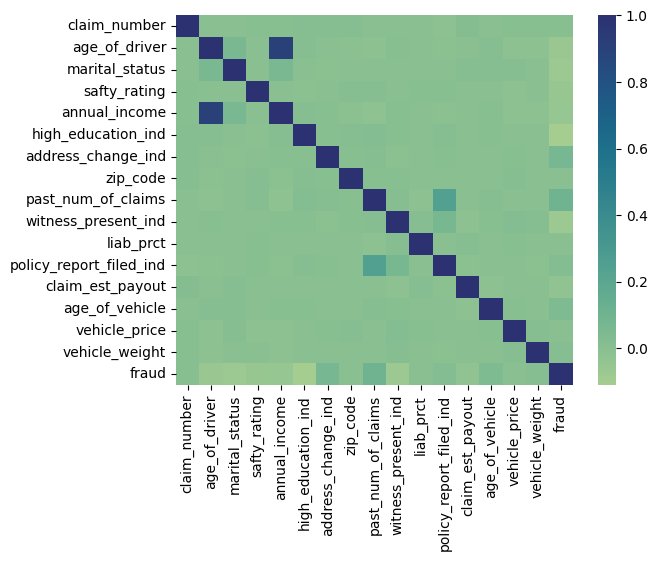

In [ ]:
# show correlation through heat map
sns.heatmap(corr, cmap="crest")
plt.show()

In [ ]:
# split the data (don't change this!)

X = df.drop(['claim_number', 'fraud'],axis=1)
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
# check the shapes
print(df.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(19000, 25)
(15200, 23) (15200,)
(3800, 23) (3800,)


# EDA

In [ ]:
# see that the date is an object
X_train['claim_date']

6787      6/6/2015
6097     1/22/2016
11219     2/2/2015
2512     6/28/2015
4279     8/24/2016
           ...    
11284     4/3/2016
11964    9/17/2015
5390     7/22/2015
860      5/25/2015
15795    3/14/2015
Name: claim_date, Length: 15200, dtype: object

In [ ]:
# correct the date column and convert to date to extract values
X_train['claim_date'] = pd.to_datetime(X_train['claim_date'],format='%m/%d/%Y', errors = 'coerce')
# confirm the type
print(X_train['claim_date'])
# do the same for test
X_test['claim_date'] = pd.to_datetime(X_test['claim_date'],format='%m/%d/%Y', errors = 'coerce')
# confirm the type
print(X_test['claim_date'])

6787    2015-06-06
6097    2016-01-22
11219   2015-02-02
2512    2015-06-28
4279    2016-08-24
           ...    
11284   2016-04-03
11964   2015-09-17
5390    2015-07-22
860     2015-05-25
15795   2015-03-14
Name: claim_date, Length: 15200, dtype: datetime64[ns]
7592    2015-10-29
12051   2016-05-25
17353   2016-08-13
17873   2015-11-17
18496   2015-09-10
           ...    
11770   2016-05-05
2574    2016-10-17
14808   2015-07-21
6556    2016-07-19
12926   2015-07-10
Name: claim_date, Length: 3800, dtype: datetime64[ns]


In [ ]:
X_train['claim_date_year'] = X_train['claim_date'].dt.year
X_train['claim_date_month'] = X_train['claim_date'].dt.month
X_train['claim_date_day'] = X_train['claim_date'].dt.day
# remove the orignal column
del X_train['claim_date']

In [ ]:
X_test['claim_date_year'] = X_test['claim_date'].dt.year
X_test['claim_date_month'] = X_test['claim_date'].dt.month
X_test['claim_date_day'] = X_test['claim_date'].dt.day
# remove the orignal column
del X_test['claim_date']

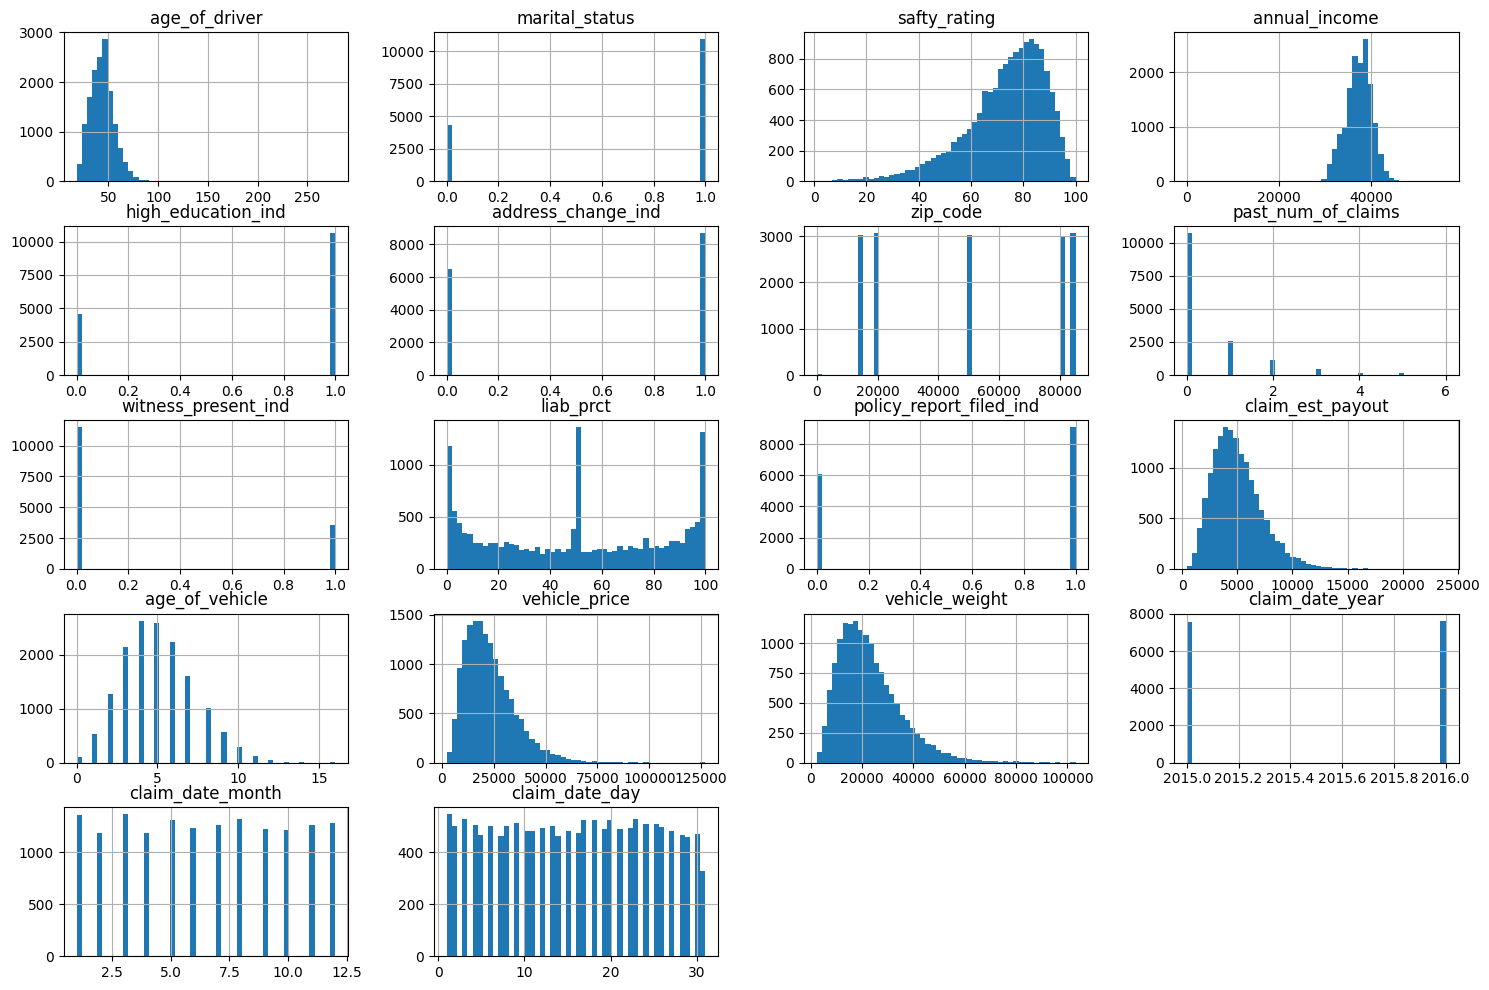

In [ ]:
# shows a histogram for all the numerical values in the dataset
X_train.hist(bins=50, figsize=(18, 12))
plt.show()

In [ ]:
# age is wrong no one can be the age of 278
X_train['age_of_driver'].describe()

count    15200.000000
mean        43.577368
std         12.115236
min         18.000000
25%         35.000000
50%         43.000000
75%         51.000000
max        278.000000
Name: age_of_driver, dtype: float64

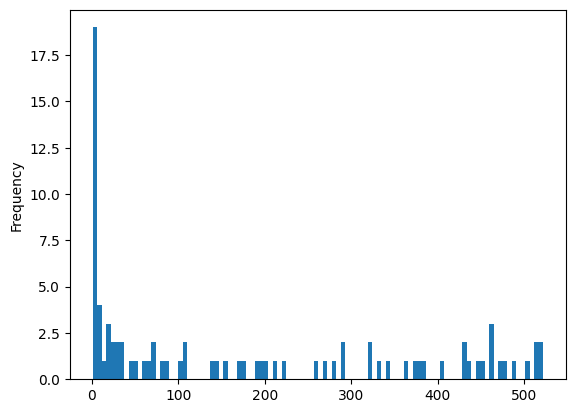

In [ ]:
# lots of values over the realistic age of drivers
X_train['age_of_driver'].value_counts().plot(kind='hist',bins=100)
plt.show()

In [ ]:
# people are incorectly encoded
X_train[X_train['age_of_driver']>100]

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_day_of_week,...,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,claim_date_year,claim_date_month,claim_date_day
8030,113,F,1.0,79,47273,1,0,Own,20135,Saturday,...,0,5175.440125,6.0,Large,19407.302320,other,12325.66136,2016,10,15
9442,278,F,1.0,76,56275,1,0,Rent,15012,Sunday,...,1,10728.273330,5.0,Large,7995.461039,blue,19242.95321,2016,2,28
15849,229,M,1.0,52,54333,1,0,Rent,50011,Saturday,...,1,5025.442762,6.0,Compact,29133.038610,silver,19643.50895,2016,11,12


In [ ]:
# impute the age to be the mean
X_train = X_train.fillna(X_train.mean())
X_train.isna().sum()

<ipython-input-176-9dd6a6a9e520>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train = X_train.fillna(X_train.mean())


age_of_driver              0
gender                     0
marital_status             0
safty_rating               0
annual_income              0
high_education_ind         0
address_change_ind         0
living_status              0
zip_code                   0
claim_day_of_week          0
accident_site              0
past_num_of_claims         0
witness_present_ind        0
liab_prct                  0
channel                    0
policy_report_filed_ind    0
claim_est_payout           0
age_of_vehicle             0
vehicle_category           0
vehicle_price              0
vehicle_color              0
vehicle_weight             0
claim_date_year            0
claim_date_month           0
claim_date_day             0
dtype: int64

In [ ]:
# impute the age to be the mean
X_test = X_test.fillna(X_test.mean())
X_test.isna().sum()

<ipython-input-177-89e227f7cd39>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_test = X_test.fillna(X_test.mean())


age_of_driver              0
gender                     0
marital_status             0
safty_rating               0
annual_income              0
high_education_ind         0
address_change_ind         0
living_status              0
zip_code                   0
claim_day_of_week          0
accident_site              0
past_num_of_claims         0
witness_present_ind        0
liab_prct                  0
channel                    0
policy_report_filed_ind    0
claim_est_payout           0
age_of_vehicle             0
vehicle_category           0
vehicle_price              0
vehicle_color              0
vehicle_weight             0
claim_date_year            0
claim_date_month           0
claim_date_day             0
dtype: int64

# Feature Engineering

In [ ]:
# inspect the variables in all the categorical columns
print(X_train['channel'].unique())

print(X_train['living_status'].unique())

print(X_train['vehicle_category'].unique())

print(X_train['vehicle_color'].unique())

print(X_train['gender'].unique())

print(X_train['claim_day_of_week'].unique())

print(X_train['accident_site'].unique())

['Broker' 'Phone' 'Online']
['Rent' 'Own']
['Large' 'Medium' 'Compact']
['gray' 'red' 'blue' 'white' 'other' 'black' 'silver']
['F' 'M']
['Saturday' 'Friday' 'Monday' 'Sunday' 'Wednesday' 'Tuesday' 'Thursday']
['Parking Lot' 'Highway' 'Local']


In [ ]:
# convert values into binary values
df_2 = pd.get_dummies(X_train['gender'])
# add the dummy values to the orignal df and store it in a different value
tmp = pd.concat((X_train,df_2),axis=1)
# drop the orignal value and the new M column
tmp = tmp.drop(columns=['gender','M'],axis=1)
# the new gender column is now binary and F = 1 and M = 0
tmp = tmp.rename(columns={'F':'gender'})
# verify the results
tmp.head()

,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_day_of_week,accident_site,...,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,claim_date_year,claim_date_month,claim_date_day,gender
6787,46,1.0,50,38294,1,0,Rent,20116,Saturday,Parking Lot,...,6420.369419,5.0,Large,12421.420480,gray,15723.35207,2015,6,6,1
6097,35,1.0,77,35552,0,0,Own,50021,Friday,Highway,...,3338.619246,1.0,Medium,22673.455310,red,15473.53232,2016,1,22,0
11219,63,1.0,86,41432,0,1,Own,15003,Monday,Local,...,2784.762551,3.0,Compact,9208.723797,blue,25495.82584,2015,2,2,0
2512,47,1.0,81,38502,1,0,Rent,15009,Sunday,Parking Lot,...,4481.845804,4.0,Large,28051.151580,gray,35830.51049,2015,6,28,0
4279,37,1.0,82,36102,0,0,Rent,20116,Wednesday,Local,...,4782.534213,8.0,Compact,38076.954140,white,41352.84911,2016,8,24,0


In [ ]:
# convert values into binary values
X_test_tmp = pd.get_dummies(X_test['gender'])
# add the dummy values to the orignal df and store it in a different value
tmp_test = pd.concat((X_test,X_test_tmp),axis=1)
# drop the orignal value and the new M column
tmp_test = tmp_test.drop(columns=['gender','M'],axis=1)
# the new gender column is now binary and F = 1 and M = 0
tmp_test = tmp_test.rename(columns={'F':'gender'})
# verify the results
tmp_test.head()

,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_day_of_week,accident_site,...,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,claim_date_year,claim_date_month,claim_date_day,gender
7592,38,0.0,89,36375,1,0,Own,50036,Thursday,Highway,...,7680.245100,6.0,Medium,28774.345150,other,15850.26097,2015,10,29,1
12051,53,1.0,75,39694,1,0,Own,85031,Wednesday,Parking Lot,...,2301.310573,2.0,Medium,7664.117156,other,16100.43385,2016,5,25,1
17353,40,0.0,61,36881,0,1,Own,20142,Saturday,Parking Lot,...,9937.850982,4.0,Medium,18207.880540,blue,54435.65309,2016,8,13,1
17873,18,0.0,82,28910,1,1,Own,15021,Tuesday,Parking Lot,...,6168.819523,2.0,Compact,24368.446320,silver,25842.79507,2015,11,17,0
18496,38,1.0,83,36370,1,0,Own,15042,Thursday,Local,...,3452.248072,8.0,Large,29676.320760,blue,34512.56327,2015,9,10,0


In [ ]:
# convert values into binary values
df_3 = pd.get_dummies(X_train['living_status'])
# add the dummy values to tmp and store it in a different value
tmp = pd.concat((tmp,df_3),axis=1)
# drop the orignal value and the new M column
tmp = tmp.drop(columns=['living_status','Rent'],axis=1)
# the new living status column is now binary and Own = 1 and Rent = 0
tmp = tmp.rename(columns={'Own':'living_status'})
# verify the results
tmp.head()

,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,claim_day_of_week,accident_site,past_num_of_claims,...,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,claim_date_year,claim_date_month,claim_date_day,gender,living_status
6787,46,1.0,50,38294,1,0,20116,Saturday,Parking Lot,0,...,5.0,Large,12421.420480,gray,15723.35207,2015,6,6,1,0
6097,35,1.0,77,35552,0,0,50021,Friday,Highway,2,...,1.0,Medium,22673.455310,red,15473.53232,2016,1,22,0,1
11219,63,1.0,86,41432,0,1,15003,Monday,Local,0,...,3.0,Compact,9208.723797,blue,25495.82584,2015,2,2,0,1
2512,47,1.0,81,38502,1,0,15009,Sunday,Parking Lot,0,...,4.0,Large,28051.151580,gray,35830.51049,2015,6,28,0,0
4279,37,1.0,82,36102,0,0,20116,Wednesday,Local,2,...,8.0,Compact,38076.954140,white,41352.84911,2016,8,24,0,0


In [ ]:
# convert values into binary values
X_test_tmp_2 = pd.get_dummies(X_test['living_status'])
# add the dummy values to tmp and store it in a different value
tmp_test = pd.concat((tmp_test,X_test_tmp_2),axis=1)
# drop the orignal value and the new M column
tmp_test = tmp_test.drop(columns=['living_status','Rent'],axis=1)
# the new living status column is now binary and Own = 1 and Rent = 0
tmp_test = tmp_test.rename(columns={'Own':'living_status'})
# verify the results
tmp_test.head()

,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,claim_day_of_week,accident_site,past_num_of_claims,...,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,claim_date_year,claim_date_month,claim_date_day,gender,living_status
7592,38,0.0,89,36375,1,0,50036,Thursday,Highway,0,...,6.0,Medium,28774.345150,other,15850.26097,2015,10,29,1,1
12051,53,1.0,75,39694,1,0,85031,Wednesday,Parking Lot,0,...,2.0,Medium,7664.117156,other,16100.43385,2016,5,25,1,1
17353,40,0.0,61,36881,0,1,20142,Saturday,Parking Lot,0,...,4.0,Medium,18207.880540,blue,54435.65309,2016,8,13,1,1
17873,18,0.0,82,28910,1,1,15021,Tuesday,Parking Lot,0,...,2.0,Compact,24368.446320,silver,25842.79507,2015,11,17,0,1
18496,38,1.0,83,36370,1,0,15042,Thursday,Local,0,...,8.0,Large,29676.320760,blue,34512.56327,2015,9,10,0,1


In [ ]:
# get channel dummies
df_4 = pd.get_dummies(X_train['channel'])
# add the dummy values to the tmp and store it in a different value
tmp = pd.concat((tmp,df_4),axis=1)
# drop the orignal value
tmp = tmp.drop(columns=['channel'],axis=1)

# get vehicle category dummies
df_5 = pd.get_dummies(X_train['vehicle_category'])
# add the dummy values to the tmp and store it in a different value
tmp = pd.concat((tmp,df_5),axis=1)
# drop the orignal value
tmp = tmp.drop(columns=['vehicle_category'],axis=1)

# get vehicle color dummies
df_6 = pd.get_dummies(X_train['vehicle_color'])
# add the dummy values to the tmp and store it in a different value
tmp = pd.concat((tmp,df_6),axis=1)
# drop the orignal value
tmp = tmp.drop(columns=['vehicle_color'],axis=1)

# get claim day of week dummies
df_7 = pd.get_dummies(X_train['claim_day_of_week'])
# add the dummy values to the tmp and store it in a different value
tmp = pd.concat((tmp,df_7),axis=1)
# drop the orignal value
tmp = tmp.drop(columns=['claim_day_of_week'],axis=1)

# get accident site of week dummies
df_8 = pd.get_dummies(X_train['accident_site'])
# add the dummy values to the tmp and store it in a different value
tmp = pd.concat((tmp,df_8),axis=1)
# drop the orignal value
tmp = tmp.drop(columns=['accident_site'],axis=1)
# check the df
tmp.head()



,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,...,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Highway,Local,Parking Lot
6787,46,1.0,50,38294,1,0,20116,0,0.0,34,...,0,0,1,0,0,0,0,0,0,1
6097,35,1.0,77,35552,0,0,50021,2,0.0,32,...,1,0,0,0,0,0,0,1,0,0
11219,63,1.0,86,41432,0,1,15003,0,0.0,50,...,0,1,0,0,0,0,0,0,1,0
2512,47,1.0,81,38502,1,0,15009,0,1.0,50,...,0,0,0,1,0,0,0,0,0,1
4279,37,1.0,82,36102,0,0,20116,2,1.0,76,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
# get channel dummies
tmp_test_3 = pd.get_dummies(X_test['channel'])
# add the dummy values to the tmp and store it in a different value
tmp_test = pd.concat((tmp_test,tmp_test_3),axis=1)
# drop the orignal value
tmp_test = tmp_test.drop(columns=['channel'],axis=1)

# get vehicle category dummies
tmp_test_4 = pd.get_dummies(X_test['vehicle_category'])
# add the dummy values to the tmp and store it in a different value
tmp_test = pd.concat((tmp_test,tmp_test_4),axis=1)
# drop the orignal value
tmp_test = tmp_test.drop(columns=['vehicle_category'],axis=1)

# get vehicle color dummies
tmp_test_5 = pd.get_dummies(X_test['vehicle_color'])
# add the dummy values to the tmp and store it in a different value
tmp_test = pd.concat((tmp_test,tmp_test_5),axis=1)
# drop the orignal value
tmp_test = tmp_test.drop(columns=['vehicle_color'],axis=1)

# get claim day of week dummies
tmp_test_6 = pd.get_dummies(X_test['claim_day_of_week'])
# add the dummy values to the tmp and store it in a different value
tmp_test = pd.concat((tmp_test,tmp_test_6),axis=1)
# drop the orignal value
tmp_test = tmp_test.drop(columns=['claim_day_of_week'],axis=1)

# get accident site of week dummies
tmp_test_7 = pd.get_dummies(X_test['accident_site'])
# add the dummy values to the tmp and store it in a different value
tmp_test = pd.concat((tmp_test,tmp_test_7),axis=1)
# drop the orignal value
tmp_test = tmp_test.drop(columns=['accident_site'],axis=1)
# check the df
tmp_test.head()


,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,...,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Highway,Local,Parking Lot
7592,38,0.0,89,36375,1,0,50036,0,0.238462,25,...,0,0,0,0,1,0,0,1,0,0
12051,53,1.0,75,39694,1,0,85031,0,0.000000,95,...,0,0,0,0,0,0,1,0,0,1
17353,40,0.0,61,36881,0,1,20142,0,0.000000,3,...,0,0,1,0,0,0,0,0,0,1
17873,18,0.0,82,28910,1,1,15021,0,1.000000,27,...,0,0,0,0,0,1,0,0,0,1
18496,38,1.0,83,36370,1,0,15042,0,1.000000,50,...,0,0,0,0,1,0,0,0,1,0


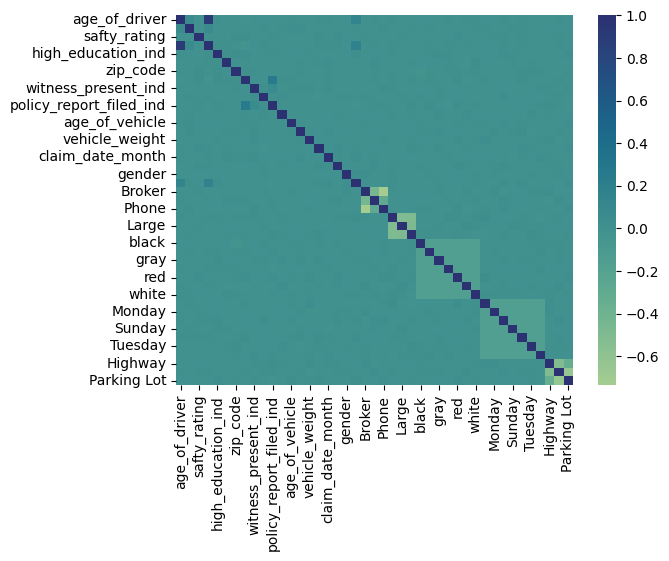

In [ ]:
# show correlation through heat map with converted values
sns.heatmap(tmp.corr(), cmap="crest")
plt.show()

In [ ]:
tmp['age_of_driver'] = np.where(X_train.age_of_driver > 75, np.NaN, X_train.age_of_driver)
tmp_test['age_of_driver'] = np.where(X_test.age_of_driver > 75, np.NaN, X_test.age_of_driver)
# annual_income has negative values

tmp['annual_income'] = np.where(X_train.annual_income < 0, np.NaN, X_train.annual_income)
tmp_test['annual_income'] = np.where(X_test.annual_income < 0, np.NaN, X_test.annual_income)
# zip_code has zero values

tmp['zip_code'] = np.where(X_train.zip_code == 0, np.NaN, X_train.zip_code)
print(tmp.describe())

tmp_test['zip_code'] = np.where(X_test.zip_code == 0, np.NaN, X_test.zip_code)

       age_of_driver  marital_status  safty_rating  annual_income  \
count   15036.000000    15200.000000  15200.000000   15186.000000   
mean       43.137736        0.717491     73.470395   37365.612801   
std        11.231481        0.450175     15.472854    2775.376707   
min        18.000000        0.000000      1.000000   28896.000000   
25%        35.000000        0.000000     65.000000   35551.000000   
50%        43.000000        1.000000     76.000000   37608.000000   
75%        51.000000        1.000000     85.000000   39317.000000   
max        75.000000        1.000000    100.000000   56275.000000   

       high_education_ind  address_change_ind      zip_code  \
count        15200.000000        15200.000000  15174.000000   
mean             0.699211            0.571579  50013.085080   
std              0.458616            0.494866  29165.509309   
min              0.000000            0.000000  15001.000000   
25%              0.000000            0.000000  20111.000000   


In [ ]:
tmp.isna().sum().sum()

204

In [ ]:
print((tmp.isnull().sum(axis=1) > 0).sum())
tmp.info()

202
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15200 entries, 6787 to 15795
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_of_driver            15036 non-null  float64
 1   marital_status           15200 non-null  float64
 2   safty_rating             15200 non-null  int64  
 3   annual_income            15186 non-null  float64
 4   high_education_ind       15200 non-null  int64  
 5   address_change_ind       15200 non-null  int64  
 6   zip_code                 15174 non-null  float64
 7   past_num_of_claims       15200 non-null  int64  
 8   witness_present_ind      15200 non-null  float64
 9   liab_prct                15200 non-null  int64  
 10  policy_report_filed_ind  15200 non-null  int64  
 11  claim_est_payout         15200 non-null  float64
 12  age_of_vehicle           15200 non-null  float64
 13  vehicle_price            15200 non-null  float64
 14  vehicle_weight 

In [ ]:
print((tmp_test.isnull().sum(axis=1) > 0).sum())
tmp_test.info()

40
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3800 entries, 7592 to 12926
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_of_driver            3764 non-null   float64
 1   marital_status           3800 non-null   float64
 2   safty_rating             3800 non-null   int64  
 3   annual_income            3798 non-null   float64
 4   high_education_ind       3800 non-null   int64  
 5   address_change_ind       3800 non-null   int64  
 6   zip_code                 3798 non-null   float64
 7   past_num_of_claims       3800 non-null   int64  
 8   witness_present_ind      3800 non-null   float64
 9   liab_prct                3800 non-null   int64  
 10  policy_report_filed_ind  3800 non-null   int64  
 11  claim_est_payout         3800 non-null   float64
 12  age_of_vehicle           3800 non-null   float64
 13  vehicle_price            3800 non-null   float64
 14  vehicle_weight   

imputing

In [ ]:
tmp = tmp.fillna(tmp.mean())
tmp.isna().sum()

age_of_driver              0
marital_status             0
safty_rating               0
annual_income              0
high_education_ind         0
address_change_ind         0
zip_code                   0
past_num_of_claims         0
witness_present_ind        0
liab_prct                  0
policy_report_filed_ind    0
claim_est_payout           0
age_of_vehicle             0
vehicle_price              0
vehicle_weight             0
claim_date_year            0
claim_date_month           0
claim_date_day             0
gender                     0
living_status              0
Broker                     0
Online                     0
Phone                      0
Compact                    0
Large                      0
Medium                     0
black                      0
blue                       0
gray                       0
other                      0
red                        0
silver                     0
white                      0
Friday                     0
Monday        

In [ ]:
tmp_test = tmp_test.fillna(X_test.mean())
tmp_test.isna().sum()

<ipython-input-191-b03d0a7eb463>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  tmp_test = tmp_test.fillna(X_test.mean())


age_of_driver              0
marital_status             0
safty_rating               0
annual_income              0
high_education_ind         0
address_change_ind         0
zip_code                   0
past_num_of_claims         0
witness_present_ind        0
liab_prct                  0
policy_report_filed_ind    0
claim_est_payout           0
age_of_vehicle             0
vehicle_price              0
vehicle_weight             0
claim_date_year            0
claim_date_month           0
claim_date_day             0
gender                     0
living_status              0
Broker                     0
Online                     0
Phone                      0
Compact                    0
Large                      0
Medium                     0
black                      0
blue                       0
gray                       0
other                      0
red                        0
silver                     0
white                      0
Friday                     0
Monday        

# Modeling

In [ ]:
X_train = tmp
X_test = tmp_test

In [ ]:
# check the shapes
print(df.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(19000, 25)
(15200, 43) (15200,)
(3800, 43) (3800,)


In [ ]:
#convert the values to numpy arrays
# X_train = np.array(X_train)
# X_test = np.array(X_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)

In [ ]:
#scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
# Create an instance of SMOTE
smote = SMOTE()
# Perform oversampling on the training data
X_smote, y_smote = smote.fit_resample(X_train, y_train)
counter = Counter(y_smote)
print(counter)

Counter({0: 12853, 1: 12853})


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# classification error metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
GBC = GradientBoostingClassifier()
GradientBoostingClassifier(OneHotEncoder(input_matrix, minimum_fraction=0.1, sparse=False, threshold=10),
                           learning_rate=0.1, max_depth=2, max_features=0.9500000000000001,
                           min_samples_leaf=7, min_samples_split=14, n_estimators=100,
                           subsample=0.8)
grid_search = GridSearchCV(GBC, param_grid, scoring='balanced_accuracy', cv=5)
grid_search.fit(X_train, y_train)

# fit the model - one line of code
GBC = GBC.fit(X_train, y_train)
# store the predictions
train_preds_GBC = GBC.predict(X_train)
test_preds_GBC = GBC.predict(X_test)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1

KeyboardInterrupt: ignored

In [ ]:
confusion_matrix(y_train, train_preds_GBC)
tn, fp, fn, tp = confusion_matrix(y_train, train_preds_GBC).ravel()
(tn, fp, fn, tp)

(12825, 28, 2232, 115)

In [ ]:
confusion_matrix(y_test, test_preds_GBC)
tn, fp, fn, tp = confusion_matrix(y_test, test_preds_GBC).ravel()
(tn, fp, fn, tp)

(3192, 17, 565, 26)

In [ ]:
# train report
trainReport_GBC = classification_report(y_train, train_preds_GBC)
print(trainReport_GBC)



              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12853
           1       0.80      0.05      0.09      2347

    accuracy                           0.85     15200
   macro avg       0.83      0.52      0.51     15200
weighted avg       0.84      0.85      0.79     15200



In [ ]:
# test report
testReport_GBC = classification_report(y_test, test_preds_GBC)
print(testReport_GBC)

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      3209
           1       0.60      0.04      0.08       591

    accuracy                           0.85      3800
   macro avg       0.73      0.52      0.50      3800
weighted avg       0.81      0.85      0.79      3800



permutation importance for top five variables


In [ ]:
import matplotlib.pyplot as plt

# permutation testing
from sklearn.inspection import permutation_importance
clf = GBC

result = permutation_importance(clf, X_test, y_test, n_repeats=15,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()[::-1][:3]

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
ax1.boxplot(result.importances[perm_sorted_idx][::-1].T, vert=False,
            labels=X.columns[perm_sorted_idx][::-1])
fig.suptitle('DTC Feature Importance', y=1.05)
fig.tight_layout()
plt.show()

# Rubric
The submitted notebook will serve as both a form of model documentation and business communication - there should be lots of text cells and comments and a nice presentation of your work. Do not send sloppy code and think you'll be fine - pretend this document is going to your AVP of Data Science - It should be both technical and business-friendly. If you send me garbage, your grade will be garbage!

## EDA, data cleaning and feature engineering (20 points)
* `X_train`, `X_test`, `y_train`, and `y_test` has been provided to all students.
  * Any team who does not do this automatically goes into last place - more below!
* Explore the data and clean it up as you see fit - make sure you `fit_transform()` on the training data and `transform()` on the test data.
  * Any team that has data leakage automatically goes into last place!
* Make five meaningful plots and five meaningful tables (most be deeper than simpler univariate plots - we want you to really explore the problem at hand and use this information to make a better model!)
* It is up to you whether or not you want to curate the training dataset to get a better fit on the test dataset (for example, if you would like to use some sampling strategy like SMOTE, that's great - just remember that you DON'T change the distribution of the target variable in the test partition.)

## Modeling (20 points)
* You may perform your modeling in a different notebook (to be submitted as an appendix), but you must run your final and BEST model here and all output must be displayed.
  * It's up to you to decide what the best pre-processing steps should be!

## Model Results (20 points)
* Classification report and confusion report for train and test partition.
  * You may use cross-validation to help pick the optimal hyperparameters for your model.
  * You may change the classification threshold from 0.5 to anything else that improves your score.
* Verify your shape of the test partition to ensure there is no data leakage!

## Interpretability and Discussion (30 points)
* Create permutation importance for top five variables
* Create partial dependence plots for top five variables
  * Don't forget about the `num_grid_points` argument to your PDP if it takes a long time to make the plot.
  * Don't wait until the last minute and say your code was crashing - work on this early or I have to deduct points!
* You may add other tables/plots/analyses to help tell your story!
*  Use your model results and interpretability items to present what variables are most influential in causing a policy cancellation.
  * We are looking for each team to provide a business recommendation based on the results of your model! We will take off substantial points if there is not a well-written and cohesive presentation of results.

## Conclusions (10 points)
* Write five meaningful bullets (each bullet should be at least two sentences long) describing what you learned.
  * Don't use ChatGPT or you get 0 points for this.

## 🛷 Sliding grading scale
* You are in direct competition with every other group in the class!
* I expect everything in this notebook to be of sufficient quality - well-organized with lots of comments and cleaned up nice for presentation to management. I will deduct substantial points if this is just my code copy/pasted without any deep analysis.
* Your 'starting grades' will range from an 80 to a 100 based on model F1 score for the TEST PARTITION (you can use the `F1 score` function from sci-kit learn to evaluate the final model.)
* Of course, if something is missing from the above rubric, we will deduct points from your starting grade.
  * If you came in first place and lost 10 points somewhere, your final grade is 100 - 10 = 90
  * If you came in last place (for accuracy) and lost 10 points somewhere, your final grade is 80 - 10 = 70.


Please use nice big, descriptive subheaders so that it is easy to grade! Thank you!